# 유튜브 랭킹 시각화

In [2]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 실행 후 런타임 다시 시작

In [1]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False      # 그래프에서 마이너스 폰트 깨지는 현상 막아줌
plt.rc('font', family='NanumBarunGothic')       # 글꼴 설정

In [2]:
 # 파일 업로드
 from google.colab import files
 uploaded = files.upload()
 filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위 (1).csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# 전부 다 string로 나옴

- 구독자수(문자형태)를 구독자수2(정수형태)로 바꾸기

In [5]:
int('1,024')        # ,가 있으면 int함수를 사용할 수 없음

ValueError: ignored

In [6]:
# ,가 있어서 df['구독자수2'] = df.구독자수.astype(int) 사용 불가능
df['구독자수2'] = df.구독자수.astype(int)

ValueError: ignored

In [7]:
df['구독자수2'] = df.구독자수.apply(lambda x: )

SyntaxError: ignored

In [8]:
x = '64,300'
int(x.replace(',',''))

64300

In [9]:
# 구독자수2 정수타입으로 새로 생성
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))       # 한 번만 쓴다면 람다사용
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [10]:
# 조회수, 비디오수도 마찬가지로 바꿀 수 있음
# 여러 번 바꾸고 싶다면 미리 함수를 정의하고 그 함수를 사용
def str2int(x):
    return int(x.replace(',',''))

In [11]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


## 비디오수 Top20 (채널명, 비디오수)를 가지고 막대 그래프 만들어보기
- hint pandas 시각화
- 채널 - 인덱스, 비디오수2를 기준으로 내림차순 정렬
- barh로 그리기

In [12]:
df.sort_values(by='비디오수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,462,390,000","553,462",2500000,553462
706,뉴스/정치/사회,연합뉴스TV,"700,000","918,130,000","362,555",700000,362555
59,TV/방송,SBS Drama,"5,480,000","5,750,870,000","340,878",5480000,340878
56,TV/방송,SBS Entertainment,"5,720,000","6,664,750,000","216,725",5720000,216725
337,뉴스/정치/사회,KBS News,"1,320,000","1,844,530,000","176,159",1320000,176159
973,뉴스/정치/사회,Arirang News,"530,000","237,210,000","123,886",530000,123886
243,뉴스/정치/사회,JTBC News,"1,710,000","2,399,540,000","116,376",1710000,116376
290,뉴스/정치/사회,MBCNEWS,"1,500,000","3,383,580,000","115,414",1500000,115414
112,TV/방송,KBS Drama,"3,470,000","4,261,110,000","114,095",3470000,114095
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,672,520,000","111,308",1780000,111308


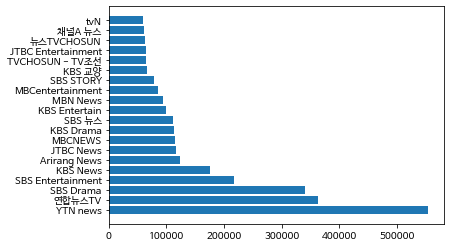

In [35]:
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)

plt.barh(df2['채널명'], df2['비디오수2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0, flags=flags)


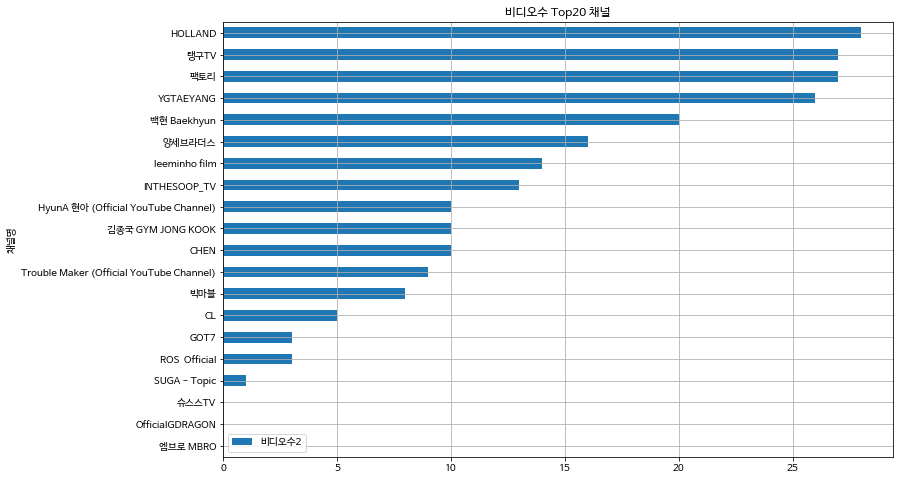

In [21]:
# 낮은 순위 20위가 나옴
df2 = df[['채널명', '비디오수2']]
df2.set_index('채널명', inplace=True)
df2.sort_values(by='비디오수2').head(20).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

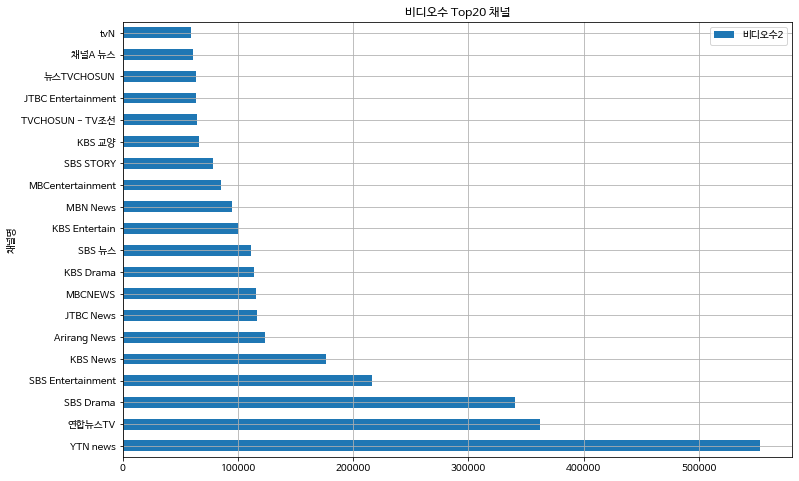

In [24]:
# 아래쪽이 길어서 보기가 불편
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)  # 비디오수 역순으로 정렬
df2.set_index('채널명', inplace=True)
df2.head(20).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

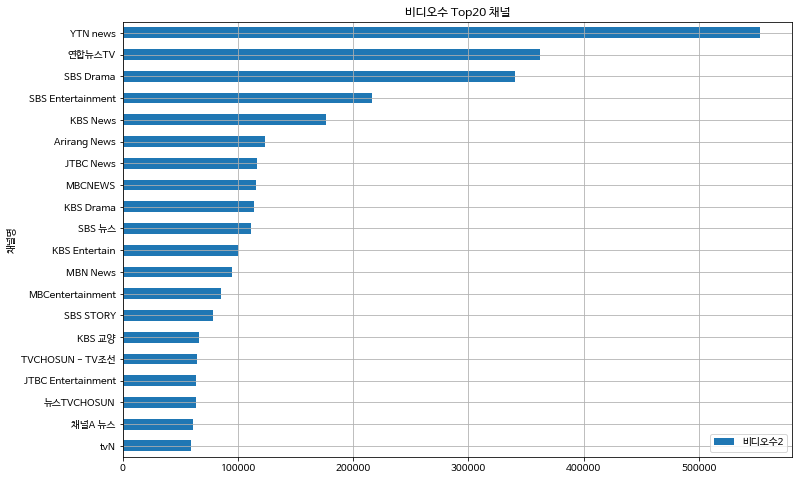

In [25]:
# 원하던 답
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))       # sort_values(by='비디오수2') 이 부분 추가
plt.title('비디오수 Top20 채널')
plt.show()

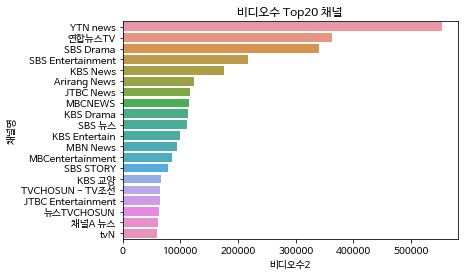

In [31]:
import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
sns.barplot(x='비디오수2', y='채널명', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.show()

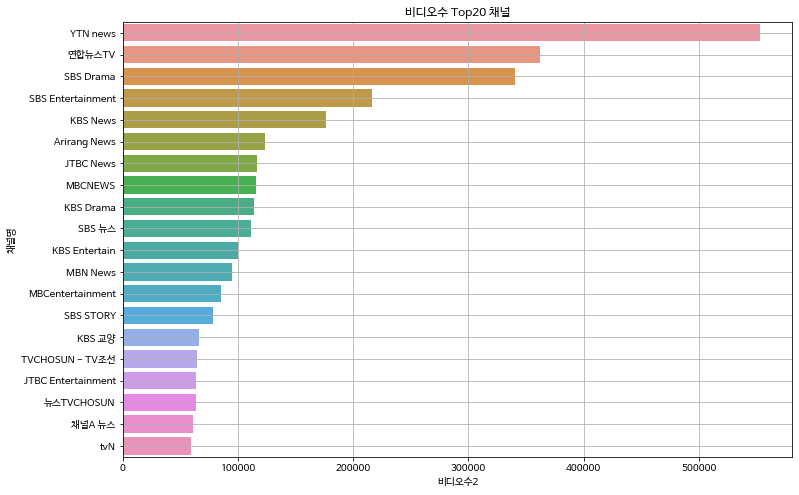

In [76]:
 import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='비디오수2', y='채널명', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.grid()
plt.show()

## 조회수 기준 Top20 채널 시각화

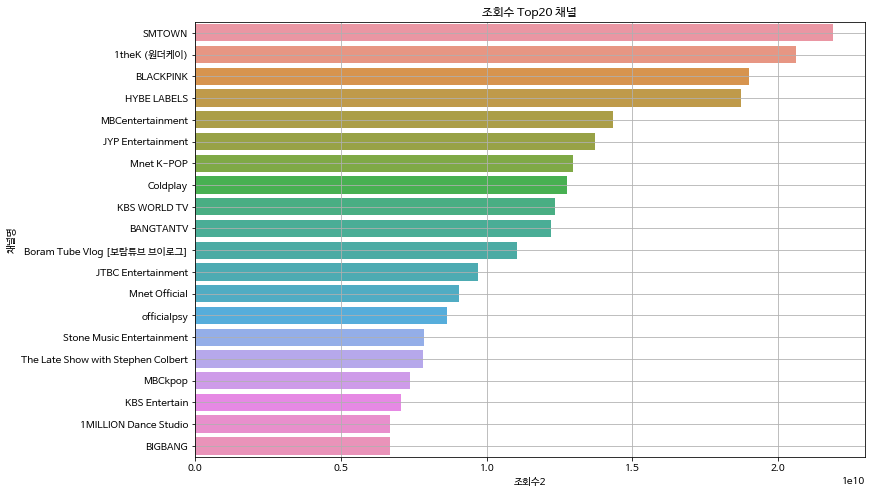

In [75]:
df['조회수2'] = df.조회수.apply(str2int)
plt.figure(figsize=(12,8))
sns.barplot(x='조회수2', y='채널명', data=df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False).head(20))
plt.title('조회수 Top20 채널')
plt.grid()
plt.show()

## 카테고리별 채널 수 분포

In [43]:
# groupby를 해서 count해서 도수를 세는 것도 하나의 방법

In [46]:
df.카테고리.value_counts()
# 시리즈로 나옴. '인덱스' '데이터'로 출력

음악/댄스/가수     171
TV/방송        146
미분류          114
키즈/어린이        88
음식/요리/레시피     85
게임            74
BJ/인물/연예인     71
뉴스/정치/사회      53
패션/미용         44
취미/라이프        38
영화/만화/애니      33
교육/강의         22
애완/반려동물       19
IT/기술/컴퓨터      8
주식/경제/부동산      8
스포츠/운동         8
해외             6
회사/오피셜         5
국내/해외/여행       4
자동차            2
취미             1
Name: 카테고리, dtype: int64

In [48]:
df.카테고리.value_counts().to_frame()       # .to_frame() 시리즈를 데이터프레임으로 바꿔줌
# Sorting이 되어있음

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [49]:
df[['카테고리', '채널명']].groupby('카테고리').count()      # 가다나순

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


### 카테고리별 채널 수 분포를 파이그래프로 나타내보기

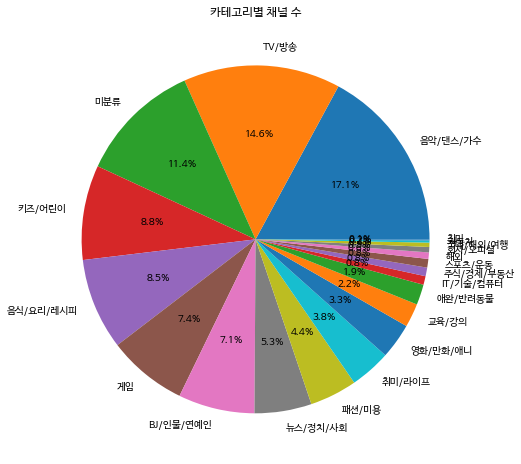

In [53]:
df3 = df['카테고리'].value_counts().to_frame()

plt.figure(figsize=(12,8))
plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

### 카테고리별 구독자수 합계 시각화

In [78]:
# groupby로 구독자수를 기준으로 해서 카테고리별로 채널수와 구독자수의 합계가 나옴
df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum'])
# 이후 구독자수와 채널수의 합계로 파이차트를 나타내거나 할 수 있음

구독자수2           
          count        sum
카테고리                      
BJ/인물/연예인    71   97560000
IT/기술/컴퓨터     8    7960000
TV/방송       146  229720000
게임           74   67170000
교육/강의        22   23420000
국내/해외/여행      4    3440000
뉴스/정치/사회     53   71020000
미분류         114  143340000
스포츠/운동        8   10840000
애완/반려동물      19   26890000
영화/만화/애니     33   34680000
음식/요리/레시피    85  180570000
음악/댄스/가수    171  674180000
자동차           2    1240000
주식/경제/부동산     8    7850000
취미            1     600000
취미/라이프       38   47890000
키즈/어린이       88  257740000
패션/미용        44   44370000
해외            6   12130000
회사/오피셜        5   11740000

In [80]:
df4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df4.columns = ['채널수', '구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
# df4.reset_index(inplace=True)
df4

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,674180000
키즈/어린이,88,257740000
TV/방송,146,229720000
음식/요리/레시피,85,180570000
미분류,114,143340000
BJ/인물/연예인,71,97560000
뉴스/정치/사회,53,71020000
게임,74,67170000
취미/라이프,38,47890000


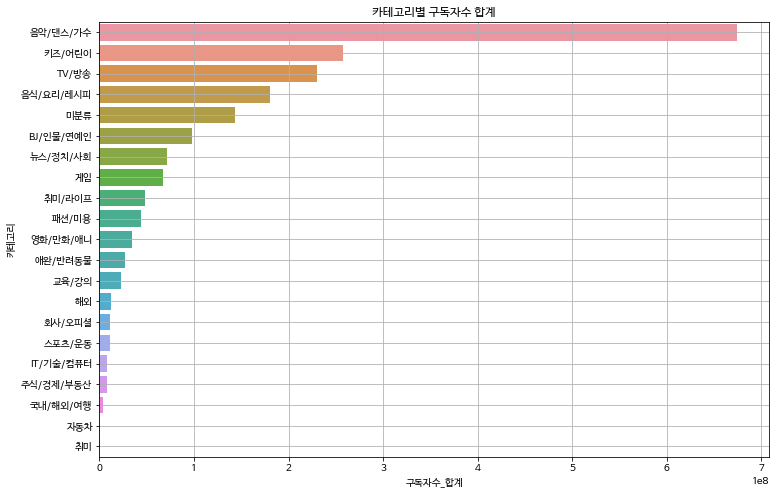

In [81]:
# 왜 모양이 다르게 나오지?? # reset_index하면 안됌
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.title('카테고리별 구독자수 합계')
plt.grid()
plt.show() 

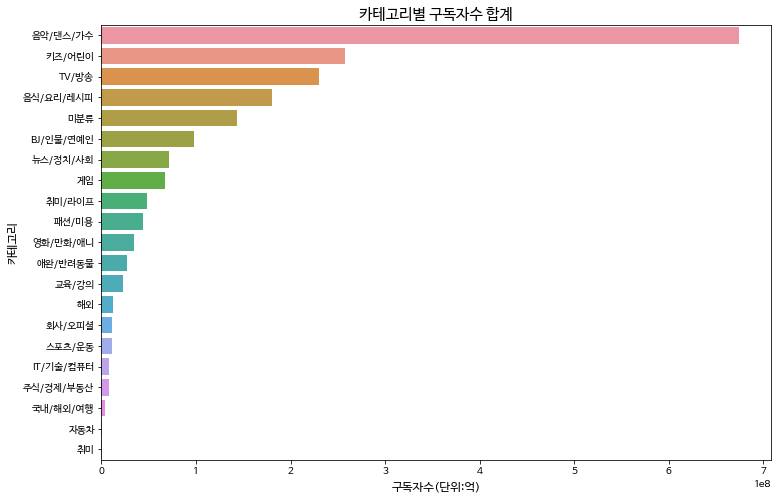

In [73]:
df_new = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum']) \
                .reset_index().sort_values(by=('구독자수2', 'sum'), ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= ('구독자수2', 'sum'), y='카테고리', data=df_new)
plt.title('카테고리별 구독자수 합계', size=15)
plt.xlabel('구독자수(단위:억)', size=12)
plt.ylabel('카테고리', size=12)
plt.show()

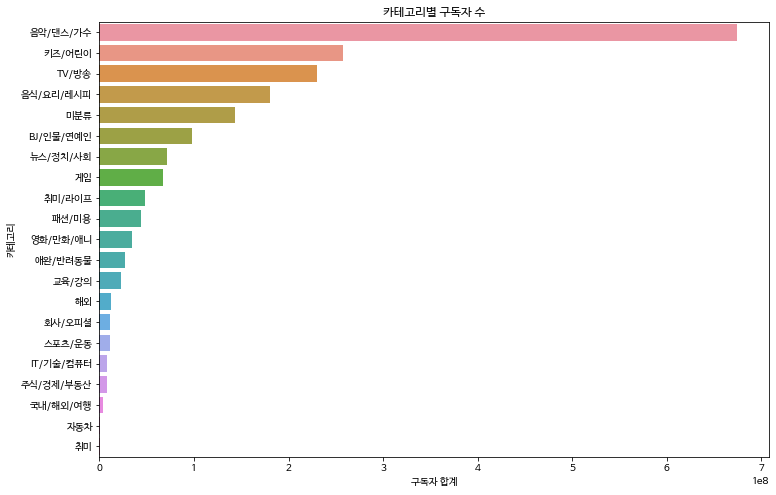

In [74]:
df4 = df.groupby('카테고리').sum().sort_values(by='구독자수2',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='구독자수2', y=df4.index, data=df4)
plt.xlabel('구독자 합계')
plt.title('카테고리별 구독자 수')
plt.show()

In [ ]:
# raw 데이터로부터 가공해서 그래프로 뽑아낼 수 있어야함
# 숫자로 나타내는 것보단 그래프로 나타내는 것이 눈에 잘 들어옴